# Moj rad

In [1]:
from __future__ import print_function
#import potrebnih biblioteka
import cv2
import collections

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.models import model_from_json

#Sklearn biblioteka sa implementiranim K-means algoritmom
from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 160, 141 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

from pocetak import *
from services.preparation_for_neural_network import *
from services.show_result import *
from debug_helper.helper import *

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/student/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


duzina inputa: 60
duzina outputs: 60
Istrenirani model uspesno ucitan.


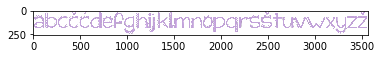

In [2]:
image_path0 = 'dataset/train/alphabet1.png'
letters0 = load_image_and_find_roi_HSV_TRAIN(image_path0)
alphabet0 = ['A', 'B', 'C', 'Č', 'Ć', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S','Š', 'T', 'U','V', 'W', 'X', 'Y', 'Z', 'Ž']

image_path1 = 'dataset/train/alphabet1.png'
letters1 = load_image_and_find_roi_HSV_TRAIN(image_path1)
alphabet1 = ['a', 'b', 'c', 'č', 'ć', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
            'n', 'o', 'p', 'q',
            'r', 's', 'š', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ž']
alphabet= alphabet0 + alphabet1
letters = letters0 + letters1

inputs = prepare_for_ann(letters)
outputs = convert_output(alphabet)
print("duzina inputa: " + str(len(inputs)))
print("duzina outputs: " + str(len(outputs)))

# probaj da ucitas prethodno istreniran model
ann = load_trained_ann()

# ako je ann=None, znaci da model nije ucitan u prethodnoj metodi i da je potrebno istrenirati novu mrezu
if ann is None:
    print("Traniranje modela zapoceto.")
    ann = create_ann()
    ann = train_ann(ann, inputs, outputs)
    print("Treniranje modela zavrseno.")
    # serijalizuj novu mrezu nakon treniranja, da se ne trenira ponovo svaki put
    serialize_ann(ann)

In [ ]:
# Učitavanje slike i određivanje regiona od interesa
validation_image_path = 'dataset/train/alphabet1.png'
distances, letters = load_image_and_find_roi_HSV_validate(validation_image_path)

In [ ]:
# PREDIKCIJA
print(extract_text(distances, letters, ann,vocabulary))

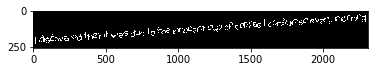

In [3]:
# POPRAVLJANJEEEE SEGMENTACIJE
image_path = 'dataset/validation/train27.png'

img = cv2.imread(image_path)
image = img.copy()
best_channel = image[:, :, 0]
ret, image_bin = cv2.threshold(best_channel, 0, 255, cv2.THRESH_OTSU)
invertovana = invert(image_bin)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(invertovana, cv2.MORPH_OPEN, kernel, iterations=1)

plt.imshow(opening,'gray')

In [4]:
# BROJANJE BROJA BELIH I CRNIH PIKSELA KAKO BIH ZNAO DA LI SU SLOVA VECEG ILI MANJEG FONTA
# PA NA OSNOVU TOGA KASNIJE RADIO ODREDJENO SKALIRANJE

# get all non black Pixels
numWhitePixel = cv2.countNonZero(opening)
print("belih: " + str(numWhitePixel))
# get pixel count of image
height, width, channels = img.shape
numTotalPixel = height*width
print("ukupno: " + str(numTotalPixel))
# compute all black pixels
numBlackPixel = numTotalPixel - numWhitePixel
print("crnih: " + str(numBlackPixel))
percentBlackPixel = numBlackPixel / numTotalPixel * 100;
percentWhitePixel = numWhitePixel / numTotalPixel * 100;
print("crnih: " + str(int(percentBlackPixel)) +"%")
print("belih: " + str(int(percentWhitePixel)) +"%")

belih: 25610
ukupno: 591360
crnih: 565750
crnih: 95%
belih: 4%


In [5]:
# ISPRAVLJANJE SLIKE
coords = np.column_stack(np.where(opening>0))
angle = cv2.minAreaRect(coords)[-1]

# print("ugao: " + str(angle))
if angle < - 45:
    angle = - (90 + angle)
else:
    angle = -angle
print(angle)

-3.6329421997070312


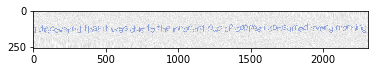

In [6]:
(h, w) = image.shape[:2]
center = (w//2,h//2)
M = cv2.getRotationMatrix2D(center,angle,1.0)
rotirana = cv2.warpAffine(image,M,(w,h),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotirana,'gray')

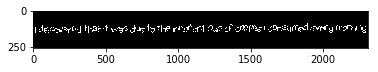

In [7]:
img = rotirana
image = img.copy()
best_channel = image[:, :, 1]
ret, image_bin = cv2.threshold(best_channel, 0, 255, cv2.THRESH_OTSU)
invertovana = invert(image_bin)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(invertovana, cv2.MORPH_OPEN, kernel, iterations=1)

plt.imshow(opening,'gray')

In [8]:
plt.rcParams['figure.figsize'] = 160, 141 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

pronadjeno kontura: 80
w: 3 h: 3 size: 6
w: 7 h: 31 size: 38
w: 3 h: 3 size: 6
w: 8 h: 33 size: 41
w: 3 h: 3 size: 6
w: 5 h: 5 size: 10
w: 7 h: 31 size: 38
w: 12 h: 8 size: 20
w: 4 h: 6 size: 10
w: 9 h: 46 size: 55
w: 7 h: 31 size: 38
w: 5 h: 5 size: 10
w: 33 h: 29 size: 62
w: 5 h: 5 size: 10
w: 6 h: 8 size: 14
w: 5 h: 7 size: 12
w: 6 h: 7 size: 13
w: 14 h: 9 size: 23
meni koristnih: 67


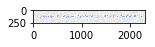

In [23]:
imga, contours, hierarchy = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_crtanje = img.copy()
regions_array = []
print("pronadjeno kontura: " + str(len(contours)))
regija_kvacica = []

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# TODO: PORAVNATI CELU SLIKU NEKAKO
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    k = y - 20
    if k < 1:
        k = y
    region = opening[y:y + h + 1, x:x + w + 1]
    povrsina = cv2.contourArea(contour)
    if (w < 5 + percentWhitePixel)  or (h < 25 + percentWhitePixel)  or (h + w) < 40:
        print("w: " + str(w) + " h: " + str(h) + " size: " + str(h+w))
        if (h>20+percentWhitePixel and w < 10 + percentWhitePixel): # vrv je I u pitanju
            region = cv2.morphologyEx(region.copy(), cv2.MORPH_DILATE, kernel, iterations=1)
            regions_array.append([resize_region(region), (x, y, w, h)])
            continue
        else: # sum koji samo preskacemo
            continue
    # ZA SVAKI REGION RADIM POBOLJSANJE
    region = cv2.morphologyEx(region.copy(), cv2.MORPH_DILATE, kernel, iterations=1)

    regions_array.append([resize_region(region), (x, y, w, h)])
    
    
plt.imshow(image_crtanje)

regions_array = sorted(regions_array, key=lambda item: item[1][0])
sorted_regions = [region[0] for region in regions_array]
sorted_rectangles = [region[1] for region in regions_array]
    

region_distances = []
# Izdvojiti sortirane parametre opisujućih pravougaonika
# Izračunati rastojanja između svih susednih regiona po x osi i dodati ih u region_distances niz
for index in range(0, len(sorted_rectangles) - 1):    
    current = sorted_rectangles[index]
    next_rect = sorted_rectangles[index + 1]    
    distance = next_rect[0] - (current[0] + current[2])  # X_next - (X_current + W_current)
    region_distances.append(distance)


print("meni koristnih: " + str(len(sorted_regions)))


In [24]:
# PREDIKCIJA
print(extract_text(region_distances, sorted_regions, ann,vocabulary))

		 recenica: l dišoovered that It wae due to the lnqooent čur of čoDfee I oonIumed e ery morning
		 procesirana recenica: I dišćovered that It We due to the innoćent Our of coffee I conšumed He very morning

I dišćovered that It We due to the innoćent Our of coffee I conšumed He very morning


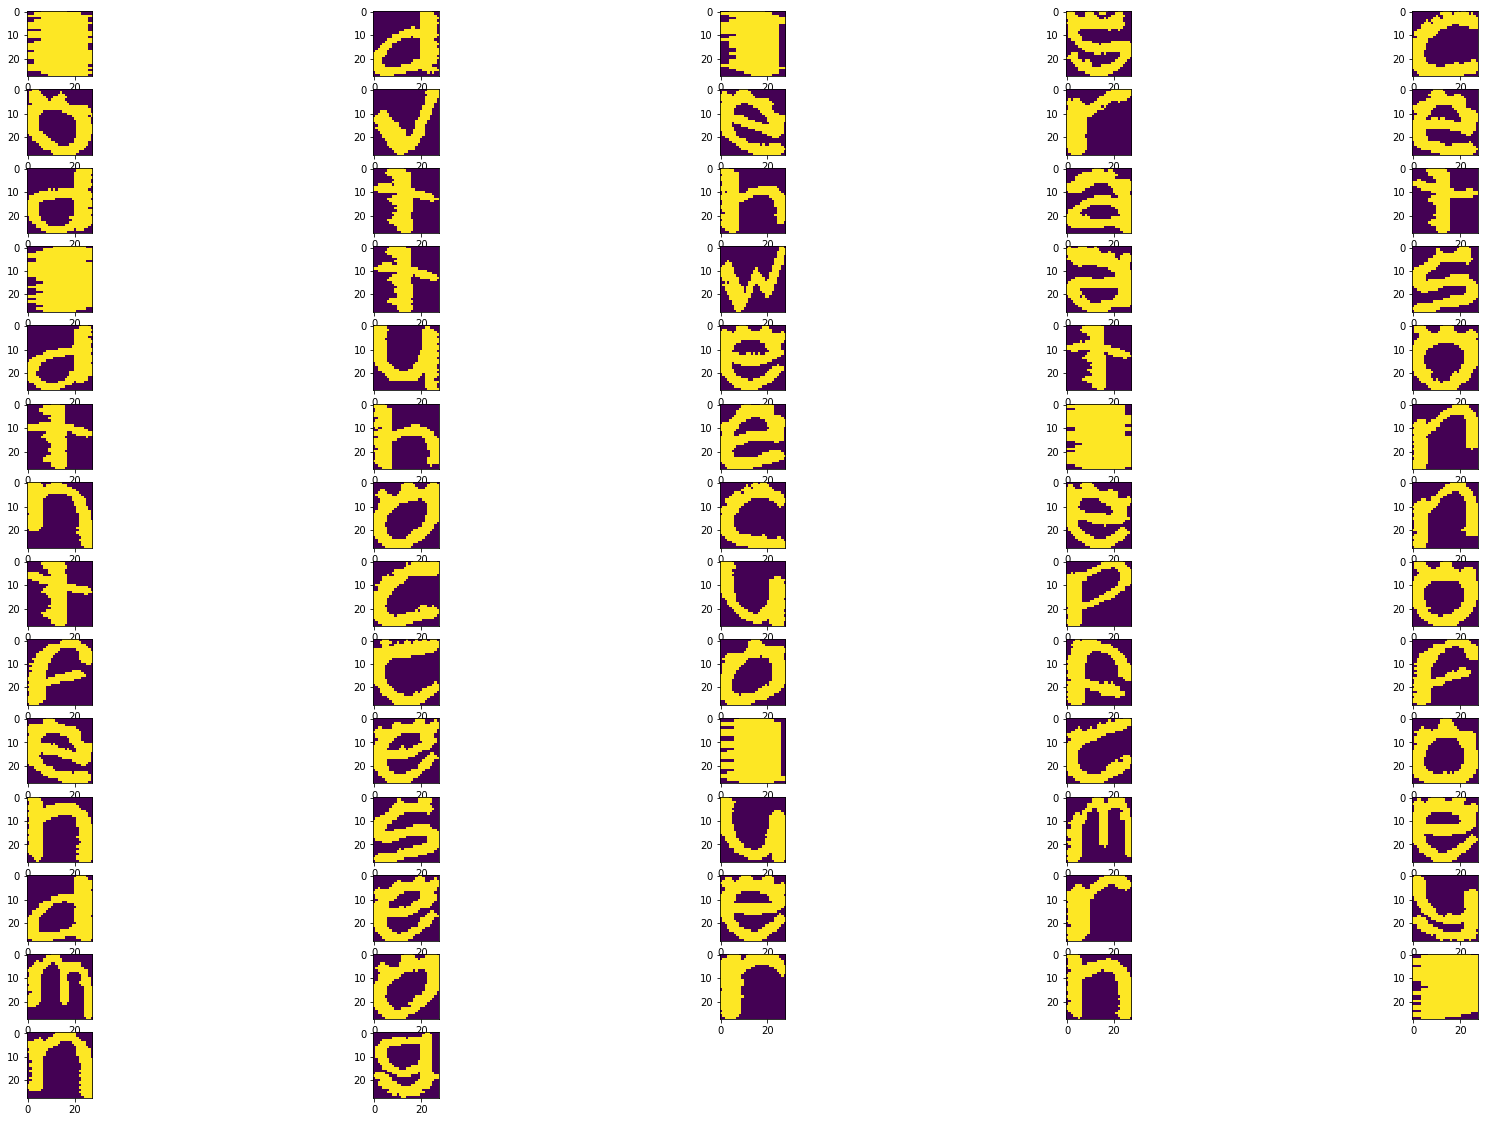

In [25]:
plt.rcParams['figure.figsize'] = 2, 2 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno
plot_images(sorted_regions)

In [ ]:
plt.imshow(sorted_regions[0])

In [ ]:
plt.imshow(sorted_regions[1])

In [ ]:
plt.imshow(sorted_regions[2])
print(sorted_rectangles[2])

In [ ]:
plt.imshow(sorted_regions[3])

In [ ]:
plt.imshow(sorted_regions[4])

In [ ]:
plt.imshow(sorted_regions[5])

In [ ]:
plt.imshow(sorted_regions[6])

In [ ]:
plt.imshow(sorted_regions[7])

In [ ]:
plt.imshow(sorted_regions[8])

In [ ]:
plt.imshow(sorted_regions[9])

In [ ]:
plt.imshow(sorted_regions[10])

In [ ]:
plt.imshow(sorted_regions[11])

In [ ]:
plt.imshow(sorted_regions[12])

In [ ]:
plt.imshow(sorted_regions[13])

In [ ]:
plt.imshow(sorted_regions[14])

In [ ]:
plt.imshow(sorted_regions[15])

In [ ]:
plt.imshow(sorted_regions[16])

In [ ]:
plt.imshow(sorted_regions[17])

In [ ]:
plt.imshow(sorted_regions[18])

In [ ]:
plt.imshow(sorted_regions[19])

In [ ]:
plt.imshow(sorted_regions[20])

In [ ]:
plt.imshow(sorted_regions[21])

In [ ]:
plt.imshow(sorted_regions[22])

In [ ]:
plt.imshow(sorted_regions[23])

In [ ]:
plt.imshow(sorted_regions[24])

In [ ]:
plt.imshow(sorted_regions[25])

In [ ]:
plt.imshow(sorted_regions[26])

In [ ]:
plt.imshow(sorted_regions[27])

In [ ]:
plt.imshow(sorted_regions[28])

In [ ]:
plt.imshow(sorted_regions[29])

In [ ]:
plt.imshow(sorted_regions[30])

In [ ]:
plt.imshow(sorted_regions[31])

In [ ]:
plt.imshow(sorted_regions[32])

In [ ]:
plt.imshow(sorted_regions[33])

In [ ]:
plt.imshow(sorted_regions[34])

In [ ]:
plt.imshow(sorted_regions[35])